# Credit Card Fraud Detection 

## Task
To Build a Classifier (To predict if a Transaction is Fraudulent or Normal)

## Background Knowledge

- It is a classification problem (binary classification)
- Data set is very much imbalanced with 492 frauds out of 284,807 transactions data.
- Data  has only numerical features, V1, V2, … V28 which are the result of a PCA transformation of actual confidential features.
- All Transactions occurred in two days. (48 hours data), of european credit cardholders.
- 'Time'(in sec) and 'Amount’(in dollors) are not transformed and presents actual real world  information.
- Feature 'Time' contains the seconds elapsed between the current and first transaction.
- Feature 'Class' is the class label and it takes value 1 in case of fraud and 0 otherwise.
- Feature 'Amount' is the transaction Amount.

## Knowing the Data

In [68]:
import pandas as pd #To importing data, Processing data, 
import seaborn as sns # To make some plots
import matplotlib.pyplot as plt # To make some plots
import numpy as np

In [69]:
#Where is the data? lets import it and call it ---- ''data''
#Read the data using pandas liberary | Creating a data frame 'data'
data_cc = pd.read_csv(r"creditcard.csv")

In [70]:
#What are the features of our data set?
data_cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [71]:
#Want to see a part of the data?
#To see the first 5 rows(instances) and all coloumns(Features) of the data
data_cc.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Clearly, data set has features as V1, V2,..., V28 (Which are PCA transformed) and other features 'Time' and 'Amount'.
- All the features are ------ 'Numeric Type'
- Class Label is a Asymetric Binary Attribute.

In [72]:
#How many rows your data set have?
print(data_cc.shape)

(284807, 31)


 - '284807 is the no of instances' with '30 no of features'. So size of data set is quite high.

In [73]:
#Is there a Null Value?
data_cc.info()
data_cc.isnull().sum().max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

0

- SO our data set has No NULL Values

### Analysing the Class Label

In [74]:
# What different values our class label have?
data_cc["Class"].unique()

array([0, 1], dtype=int64)

- So our class has 2 lables as 0 (normal) and 1(fraudulent)       ---- as expected!
- So it a case of Binary Classification

In [75]:
# How many fraudulent cases are in the dataset.
#extracted two data frames 1. fraud and valid containing all fraud and normal transaction cases, respectively!
fraud = data_cc[data_cc['Class'] == 1]
valid = data_cc[data_cc['Class'] == 0]
print("No of Fraud class label 0  :",len(fraud))
print("No of Normal class Label 1 :",(len(valid)))
print("Percent Fraud cases        :", len(fraud)/float(len(valid))*100, "%")

No of Fraud class label 0  : 492
No of Normal class Label 1 : 284315
Percent Fraud cases        : 0.17304750013189596 %


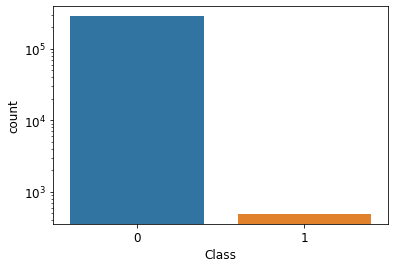

In [76]:
#Lets Visualize it in a Bar Graph!
#It has to be a count plot of different values of 'class'

sns.countplot(x ='Class', data = data_cc, log = True) # plot on the log scale

- Hence, The data set is highy imbalanced.
- How do we deal with Imbalanced data set for a classification problem?

### Analysing the feature --- 'Amount'

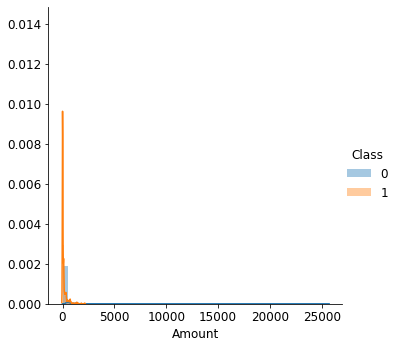

In [77]:
#lets see how the data is distributed for different class labels
sns.FacetGrid(data_cc, hue="Class", height=5) \
   .map(sns.distplot, "Amount") \
   .add_legend();
plt.show();

In [78]:
#How to see the Statistical measures for class type ---- 1 (Fraud) and 0 (normal) 
print("Fraud Transaction")
print(fraud.Amount.describe())
print("\n\nNormal Transaction")
print(valid.Amount.describe())

Fraud Transaction
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Normal Transaction
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


- clearly mean amount value of Fraud transaction is more than normal transaction. so its very important to predict it!

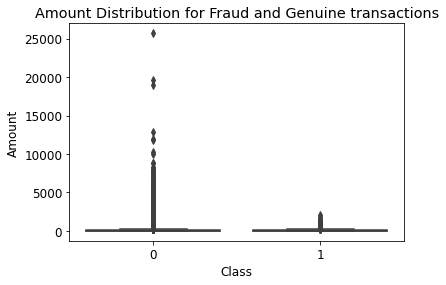

In [79]:
#How does the 'Amount' values of a normal and fradulunt transaction look like?
#We can use box Plot here
ax = sns.boxplot(x='Class', y='Amount',data = data_cc)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

 - So one can find some offset values (it will be obvious to treat them as outlier values and we can remove them form our data)
 - we can use this Observation in our model (that roughly amount values more than 3000 are normal transaction)

**Results**
- Most the transaction amount falls between 0 and about 3000
- we have some outliers for really big amount transactions
- it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. 
- Also, we should be conscious about that these **outliers should not be the fraudulent transaction**. 
- Generally, fraudulent transactions of the very big amount and removing them from the data can make the predicting model bais. 

- So we can essentially build a model that realistically predicts transaction as fraud without affected by outliers. 
- It may not be really useful to actually have our model train on these extreme outliers.

### Analysing the feature --- 'Time'

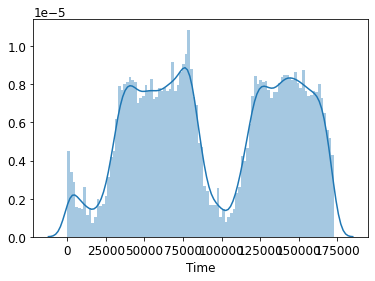

In [80]:
#Distribution of 'Time'?
sns.distplot(data_cc['Time'], bins=100)
plt.show()

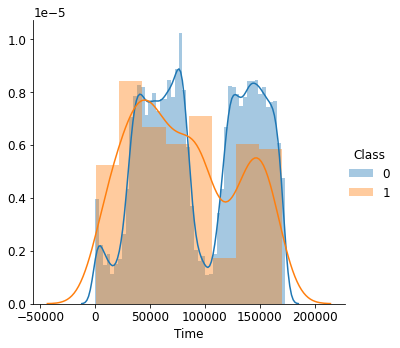

In [81]:
#lets see how different class labels depends on time?
sns.FacetGrid(data_cc, hue="Class", height=5) \
   .map(sns.distplot, "Time") \
   .add_legend();
plt.show();

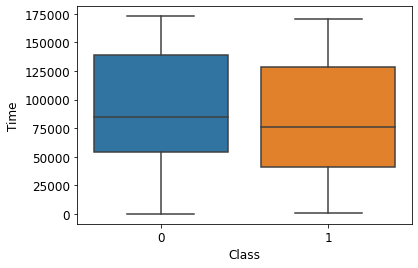

In [82]:
#Plot the Box Plots?
ax1 = sns.boxplot(x='Class', y='Time',data = data_cc)
plt.show()

- We cannot differentiate visually different classes on 'Time' values

In [83]:
#Statistics for 'Time'?
data_cc.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

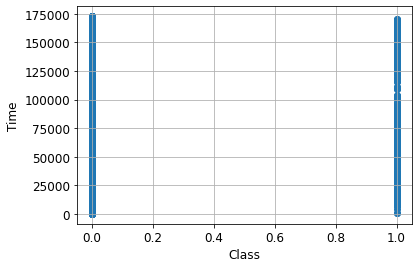

In [84]:
# As 'Time' changes When does fraud transasdction occuur?
plt.xlabel('Class')
plt.ylabel('Time')
plt.scatter(data_cc['Class'],data_cc['Time'])
plt.grid()


- Analyse this time variable more.
- comvert time into hoiurse and then day no 1,2,3,.... into nights and days and see if there is a relation b/t them with class

## Analysing the PCA transformed Features V1,V2...V28

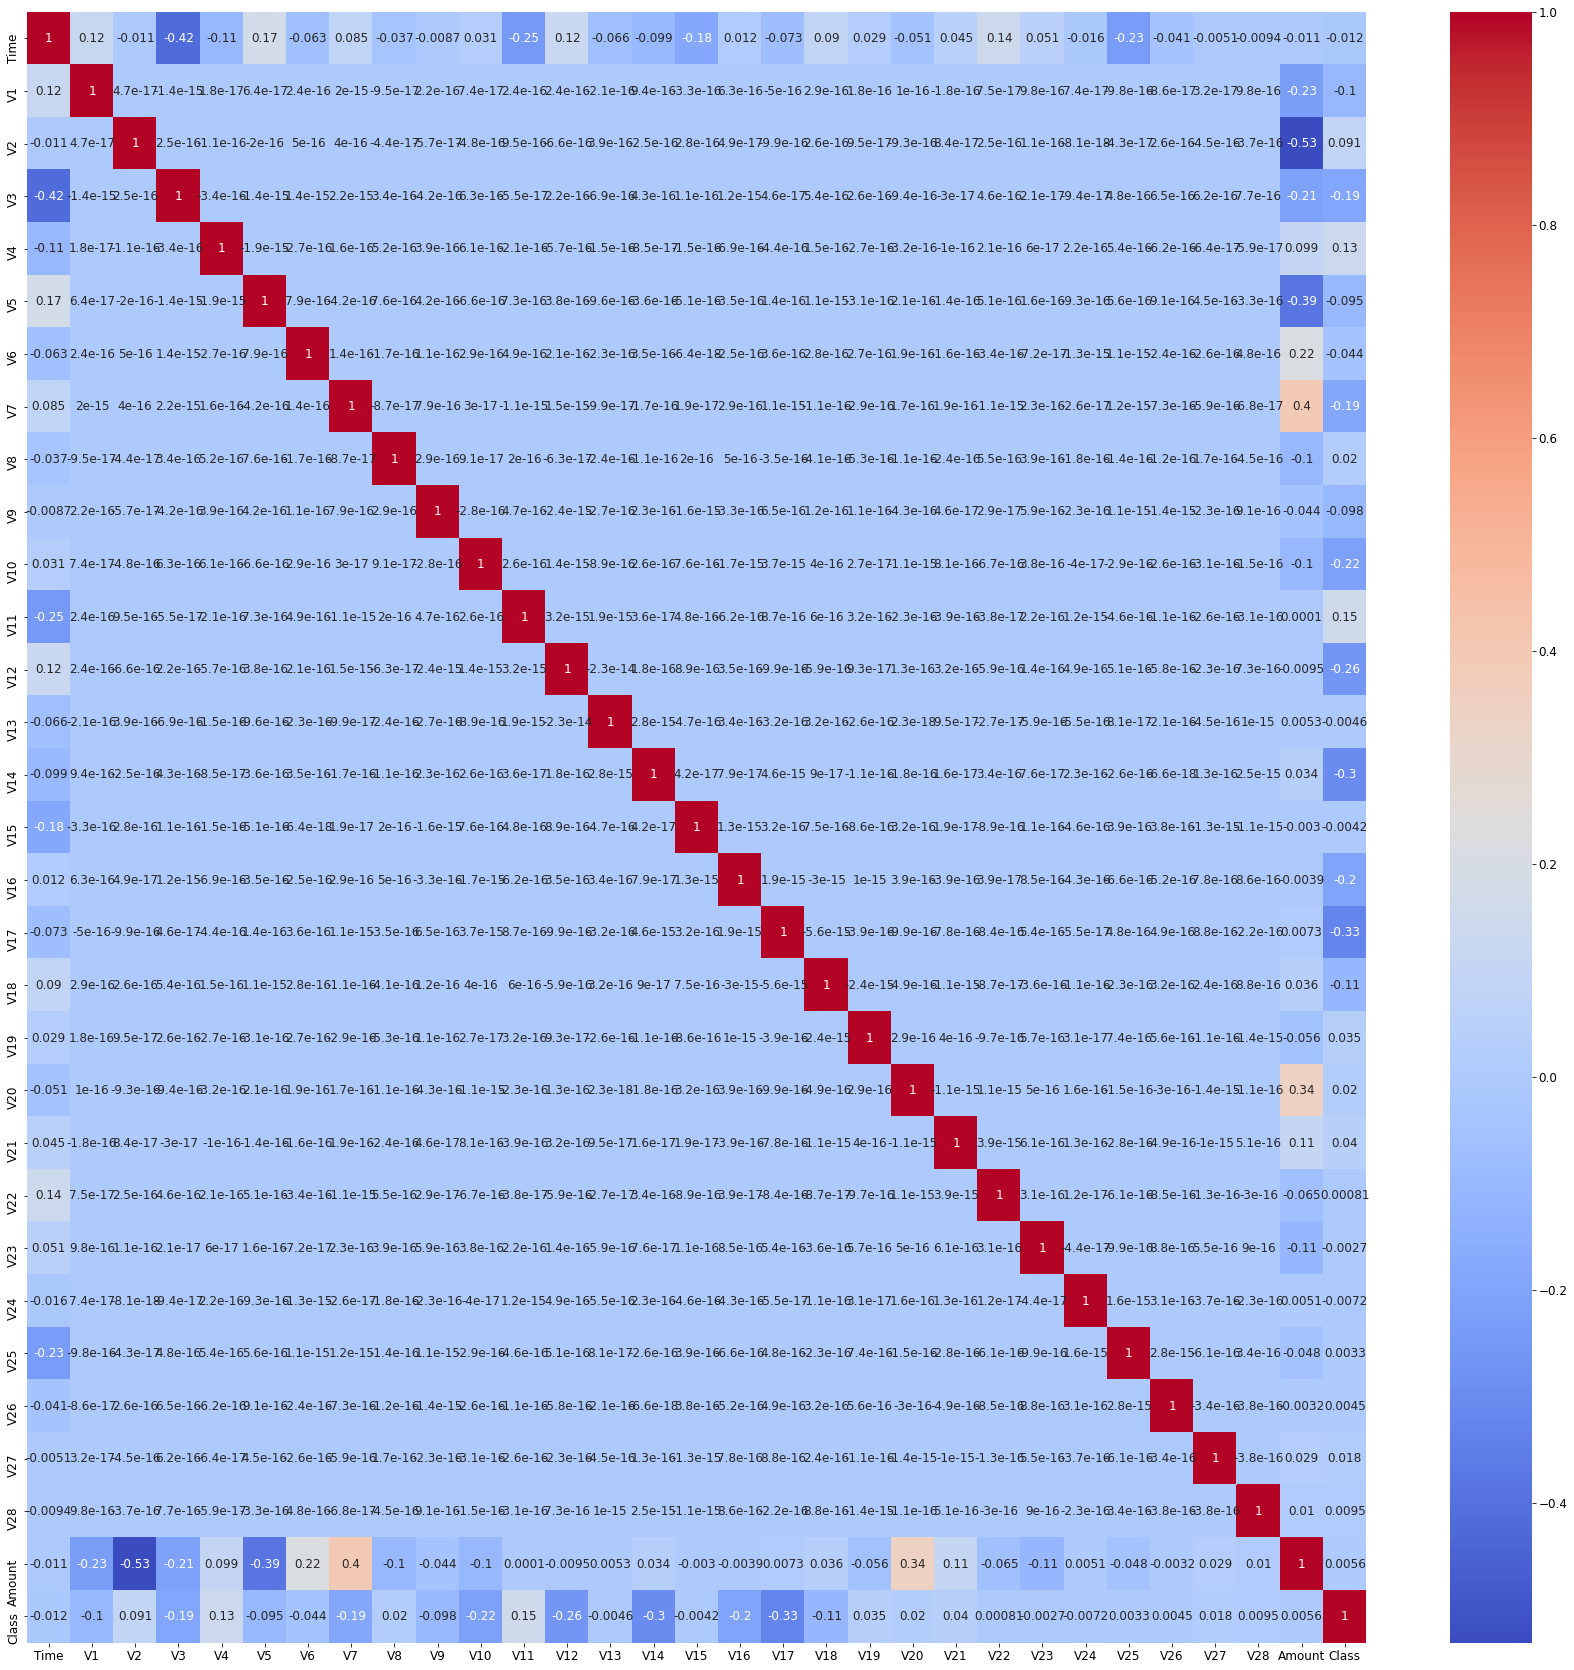

In [85]:
#How does the Coorelation Matrix look like?
#So that we can see which feature out of V1 to V28 affect the most.
plt.figure(figsize=(30,30))
sns.heatmap(data_cc.corr(),annot=True,cmap="coolwarm")

#### Observations
- Most of the features do not correlate to other features 
- But there are some features that either have a positive or a negative correlation with each other. 
- For example - 
- Strong correlation is not with any of the V1 to V28.
- out of V1 to V28... In the order of importance.. We can see from the table... are
- +ve correlation with 'Class' : V11(0.15) and V4(0.13) others can be ignored(depending on the model to implement)
- -ve correlation with 'Class' : V17(-0.33), V14(-0.3), v12 (-0.26), v16(-0.22) and others can be ignored or Like that.
- But how many to Drop????
- Or we may build new features out of these. But how and why to do that????

In [86]:
data_cc[['Time','Amount','Class']].corr()['Class'].sort_values(ascending=False).head(10)

Class     1.000000
Amount    0.005632
Time     -0.012323
Name: Class, dtype: float64

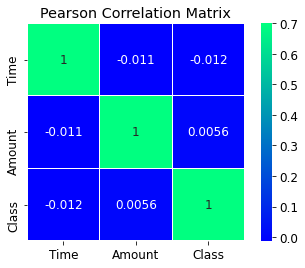

In [87]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(data_cc[['Time', 'Amount','Class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="winter",
            linecolor='w',annot=True);


Highlights

It looks like that no features are highly correlated with any other features.

## Feature Engineering on 'Time' feature
Converting time from second to hour

In [88]:
# Converting time from second to hour
data_cc['Time'] = data_cc['Time'].apply(lambda sec : (sec/3600))

### Visualising Data for detecting any particular Pattern or Anomaly using Histogram Plots
Finally visulaising all columns once and for all to observe any abnormality

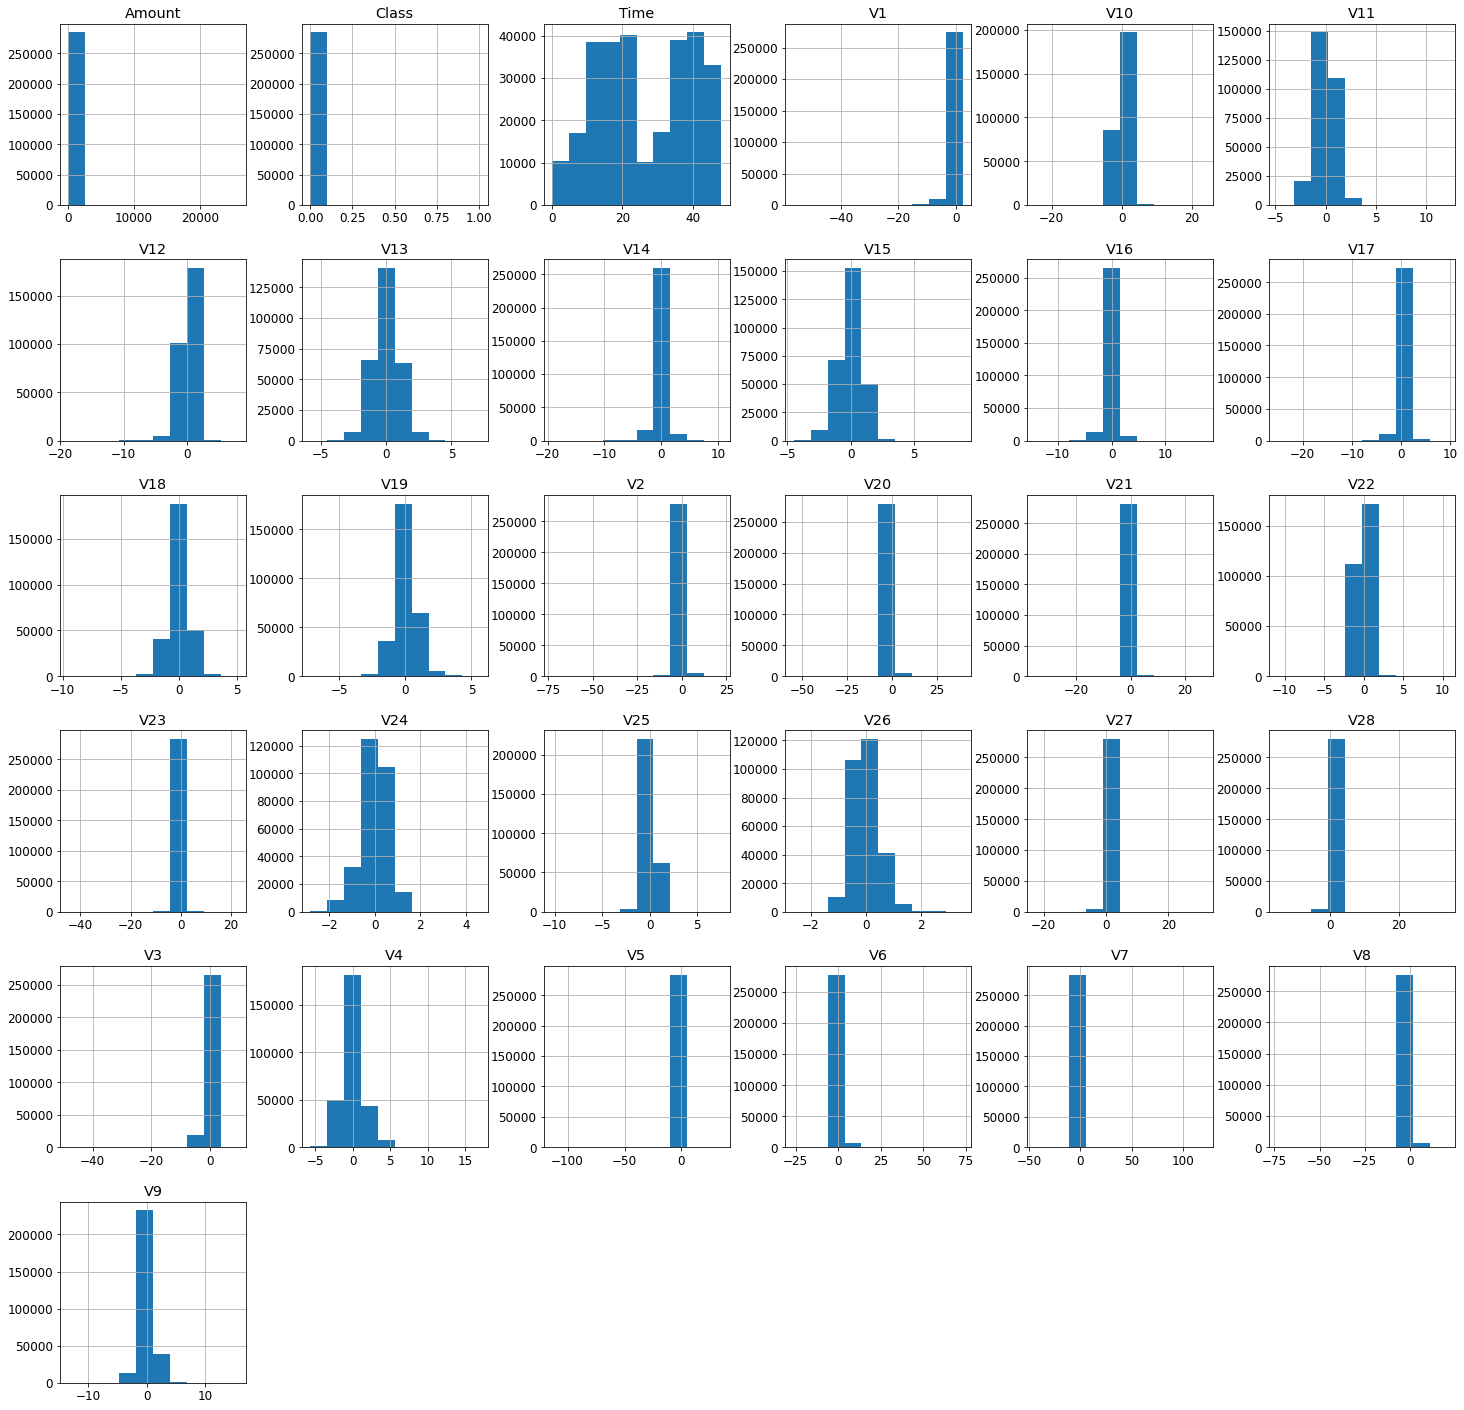

In [89]:
data_cc.hist(figsize = (25,25))
plt.show()

# Scale Amount Feature


- It is a good idea to scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range.
- This will result in a better prediction model.

# 1. Scale amount by Log
Scaling using the log: There are two main reasons to use logarithmic scales in charts and graphs.

- The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.
- The second is to show per cent change or multiplicative factors.

In [90]:
# Scale amount by log
data_cc['amount_log'] = np.log(data_cc.Amount+.01 )
data_cc.amount_log.describe()

count    284807.000000
mean          2.960364
std           1.950786
min          -4.605170
25%           1.724551
50%           3.091497
75%           4.346076
max          10.153903
Name: amount_log, dtype: float64

# 2. Scale amount by Standardization
Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation.
$$ z = \frac{x_i - \mu}{\sigma} $$                                            

In [91]:
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
data_cc['amount_scaled'] = ss.fit_transform(data_cc['Amount'].values.reshape(-1,1))
data_cc.amount_scaled.describe()

count    2.848070e+05
mean     3.202236e-16
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: amount_scaled, dtype: float64

# 3. Scale  amount by Normalization
Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

$$ x_{norm} = \frac{x_i - x_{min}}{x_{max}-x_{min}} $$

In [92]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler() # object of the class StandardScaler ()
data_cc['amount_minmax'] = mm.fit_transform(data_cc['Amount'].values.reshape(-1,1))
data_cc.amount_minmax.describe()

count    284807.000000
mean          0.003439
std           0.009736
min           0.000000
25%           0.000218
50%           0.000856
75%           0.003004
max           1.000000
Name: amount_minmax, dtype: float64

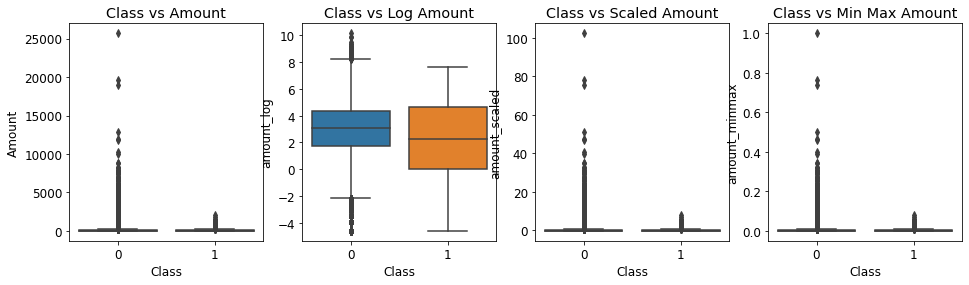

In [93]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="Class",y="Amount",data=data_cc, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="Class",y="amount_log",data=data_cc, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_scaled",data=data_cc, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="Class",y="amount_minmax",data=data_cc, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

**Hightlights**

* We can see a slight difference in the log amount of our two Classes. 
* The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.
* **By seeing the above three graphs, scaling the amount by log will best suit for our model.**

**Since our dataset is highly imbalanced, we will check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.**

## Appliying PCA

In [94]:
from sklearn.decomposition import PCA
pca = PCA()
data_pca = data_cc.copy()
data_pca.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,amount_log,amount_scaled,amount_minmax
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.008166,0.244964,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.993252,-0.342475,0.000105


#### Removing the unwanted features now - 'amount_scaled'	'amount_minmax'   'Amount'

In [95]:
data_pca = data_pca.drop(labels = ['Amount','amount_scaled','amount_minmax'], axis=1)
data_pca.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008166
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.993252


In [96]:
data_pca.Time.describe

<bound method NDFrame.describe of 0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time, Length: 284807, dtype: float64>

## We have scale the Time Feature as well

In [97]:
# Scale amount by log
data_pca['Time_log'] = np.log(data_cc.Time+.01 )
data_pca.Time_log.describe()

count    284807.000000
mean          3.065198
std           0.811180
min          -4.605170
25%           2.712439
50%           3.158512
75%           3.656102
max           3.871363
Name: Time_log, dtype: float64

In [98]:
data_pca = data_pca.drop(labels = ['Time'], axis=1)
data_pca.head(2)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_log,Time_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008166,-4.60517
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.993252,-4.60517


## Now our all data is normalized. 

In [99]:
data_pca.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount_log,Time_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.008166,-4.605170
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.993252,-4.605170
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.936665,-4.577771
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.816322,-4.577771
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.248495,-4.551103


Separate the Class Label to 'c_label' and drop it from data_pca

In [100]:
c_label = data_pca['Class']

data_pca = data_pca.drop(labels = ['Class'], axis=1)
data_model = data_pca
data_pca.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,amount_log,Time_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166,-4.605170
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252,-4.605170
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665,-4.577771
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322,-4.577771
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495,-4.551103


## now lets Standardise the DATA before doing the PCA

In [101]:
# Data-preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data_pca)
print(standardized_data.shape)

(284807, 30)


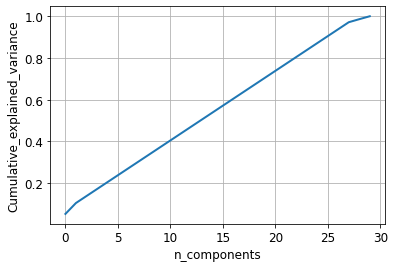

In [102]:
# PCA for dimensionality redcution (non-visualization)
sample_data = standardized_data
pca.n_components = 30
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


# we have to take 25-dimensions, approx. 90% of variance is expalined.

    Here we cannot conclude anything to remove some features for feature reduction using PCA.
    So we will take all the features forward and implement the models

In [103]:
data_model

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,amount_log,Time_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166,-4.605170
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252,-4.605170
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665,-4.577771
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322,-4.577771
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495,-4.551103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.248461,3.871328
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210844,3.871334
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217889,3.871340
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.303585,3.871340


# Model Building 

1  __Classification Models__

- Logistic Regression
- Decision Trees
- Random Forest
- Naive Bayes Classifier 

2  __Class Imbalance Solutions__

- Under Sampling
- Over Sampling
- SMOTE
- ADASYN

3  __Metrics__

- Accuracy Score
- Confusion Matrix
- Precision Score
- Recall Score
- ROC_AUC
- F1 Score

In [104]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [105]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data_model, c_label, test_size=0.30, shuffle=True, random_state=101)

In [106]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 30)
y_train -  (199364,)
X_test -  (85443, 30)
y_test -  (85443,)


### 1. Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [108]:
X_train, X_test, y_train, y_test = train_test_split(data_model, c_label, test_size=0.3, shuffle=True, random_state=0) 


logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [109]:
y_pred = logreg.predict(X_test)

### Model Evaluation - Logistic Regression without balancing

In [110]:
from sklearn import metrics

In [111]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99923
AUC : 0.81286
Precision : 0.89320
Recall : 0.62585
F1 : 0.73600




 Recall score and F1 score to measure the performance of our model, not the accuracy. (In the case of Imbalanced data)

In [112]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    85340
1      103
dtype: int64

so our model is predicting 102 as fraudulent and 85341 as normal transaction

#### Confusion Matrix


In [113]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85285,    11],
       [   55,    92]], dtype=int64)

True Negative - 85285 (truely saying negative - genuine transaction correctly identified as genuine)

True Postive - 91 (truely saying positive - fraud transaction correctly identified as fraud)

False Negative - 56 ( falsely saying negative - fraud transaction incorrectly identified as genuine)

False Positive - 11 ( falsely saying positive - genuine transaction incorrectly identified as fraud)

## Handeling the Class imbalance

In [114]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

#### Logistic Regression with Random Undersampling technique

In [115]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [116]:
X = data_model
y = c_label

In [117]:
#Doing Undersampling 
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, shuffle=True, random_state=0)

# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [119]:
# now checking the Matric
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.94595
AUC : 0.94608
Precision : 0.96503
Recall : 0.92617
F1 : 0.94521


In [120]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[142,   5],
       [ 11, 138]], dtype=int64)

#### Logistic Regression with Random Oversampling technique

In [121]:
from imblearn.over_sampling import RandomOverSampler

In [122]:
print('Original dataset shape %s' % Counter(y))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [123]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, shuffle=True, random_state=0)

# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [124]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.94642
AUC : 0.94646
Precision : 0.97481
Recall : 0.91667
F1 : 0.94485


#### Over sampling is performaing better that under sampling 

# Building different models with different balanced datasets

### 1. Undersampled Data

In [125]:
#so lets create different data sets 
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, shuffle=True, test_size=0.3, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


### 2. Oversampled data

In [126]:
print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

# Slit into train and test datasets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, shuffle=True, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


### 3. SMOTE data  

In [127]:
print('Original dataset shape %s' % Counter(y))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

# Slit into train and test datasets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, shuffle=True, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


### 4.  ADASYN Data

In [128]:
print('Original dataset shape %s' % Counter(y))

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_adasyn))

# Slit into train and test datasets
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, shuffle=True, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284310})


In [129]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [130]:
names_lst = []


# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, shuffle=True, random_state=0)
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_test_pred = model.predict(X_test)

        # calculate accuracy          
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        #print('F1 Score of '+ name +' model : {0:0.5f}'.format(F1Score_test))

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

## 1. Logistic Regression (LR)

Model Name : LR imbalance
Test Accuracy :0.99923
Test AUC : 0.81286
Test Precision : 0.89320
Test Recall : 0.62585
Test F1 : 0.73600
Confusion Matrix : 
 [[85285    11]
 [   55    92]]


Model Name : LR Undersampling
Test Accuracy :0.94257
Test AUC : 0.94268
Test Precision : 0.95833
Test Recall : 0.92617
Test F1 : 0.94198
Confusion Matrix : 
 [[141   6]
 [ 11 138]]


Model Name : LR Oversampling
Test Accuracy :0.94640
Test AUC : 0.94645
Test Precision : 0.97479
Test Recall : 0.91667
Test F1 : 0.94484
Confusion Matrix : 
 [[83147  2025]
 [ 7118 78299]]


Model Name : LR SMOTE
Test Accuracy :0.94524
Test AUC : 0.94528
Test Precision : 0.97320
Test Recall : 0.91586
Test F1 : 0.94366
Confusion Matrix : 
 [[83018  2154]
 [ 7187 78230]]


Model Name : LR ADASYN
Test Accuracy :0.88112
Test AUC : 0.88119
Test Precision : 0.90166
Test Recall : 0.85625
Test F1 : 0.87837
Confusion Matrix : 
 [[77088  7986]
 [12293 73221]]




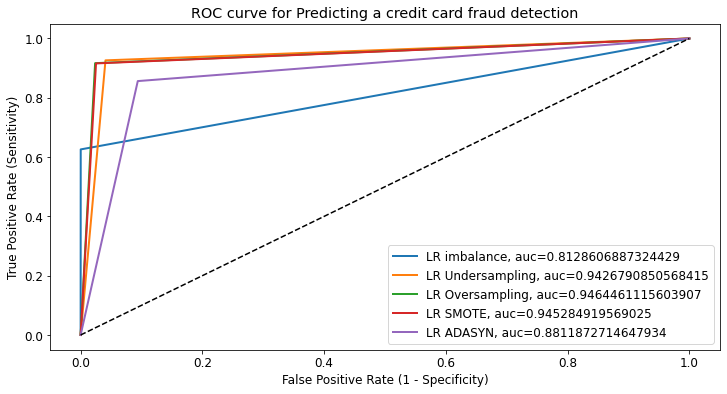

In [131]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_over,y_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_smote,y_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

## 2. Decision Tree 

Model Name : DT imbalance
Test Accuracy :0.99924
Test AUC : 0.87059
Test Precision : 0.80147
Test Recall : 0.74150
Test F1 : 0.77032
Confusion Matrix : 
 [[85269    27]
 [   38   109]]


Model Name : DT Undersampling
Test Accuracy :0.88851
Test AUC : 0.88871
Test Precision : 0.91429
Test Recall : 0.85906
Test F1 : 0.88581
Confusion Matrix : 
 [[135  12]
 [ 21 128]]


Model Name : DT Oversampling
Test Accuracy :0.99974
Test AUC : 0.99974
Test Precision : 0.99949
Test Recall : 1.00000
Test F1 : 0.99974
Confusion Matrix : 
 [[85128    44]
 [    0 85417]]


Model Name : DT SMOTE
Test Accuracy :0.99810
Test AUC : 0.99810
Test Precision : 0.99730
Test Recall : 0.99891
Test F1 : 0.99810
Confusion Matrix : 
 [[84941   231]
 [   93 85324]]


Model Name : DT ADASYN
Test Accuracy :0.99857
Test AUC : 0.99857
Test Precision : 0.99769
Test Recall : 0.99946
Test F1 : 0.99857
Confusion Matrix : 
 [[84876   198]
 [   46 85468]]




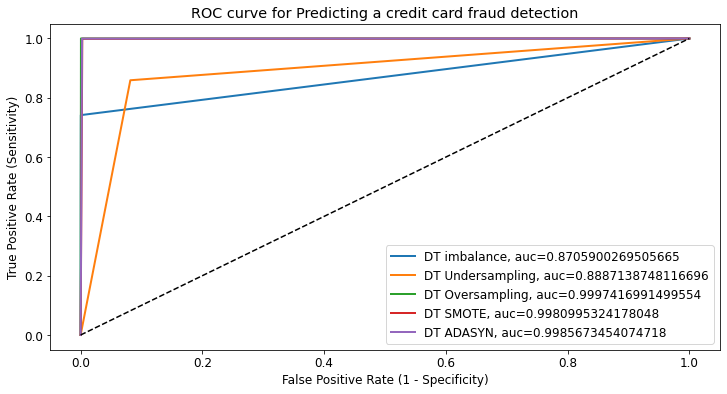

In [132]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt,X_under,y_under))
DTmodels.append(('DT Oversampling', dt,X_over,y_over))
DTmodels.append(('DT SMOTE', dt,X_smote,y_smote))
DTmodels.append(('DT ADASYN', dt,X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

## 3. Random Forest (RF)

Model Name : RF imbalance
Test Accuracy :0.99951
Test AUC : 0.88091
Test Precision : 0.94118
Test Recall : 0.76190
Test F1 : 0.84211
Confusion Matrix : 
 [[85289     7]
 [   35   112]]


Model Name : RF Undersampling
Test Accuracy :0.93919
Test AUC : 0.93955
Test Precision : 0.99248
Test Recall : 0.88591
Test F1 : 0.93617
Confusion Matrix : 
 [[146   1]
 [ 17 132]]


Model Name : RF Oversampling
Test Accuracy :0.99996
Test AUC : 0.99996
Test Precision : 0.99993
Test Recall : 1.00000
Test F1 : 0.99996
Confusion Matrix : 
 [[85166     6]
 [    0 85417]]


Model Name : RF SMOTE
Test Accuracy :0.99988
Test AUC : 0.99988
Test Precision : 0.99975
Test Recall : 1.00000
Test F1 : 0.99988
Confusion Matrix : 
 [[85151    21]
 [    0 85417]]


Model Name : RF ADASYN
Test Accuracy :0.99988
Test AUC : 0.99988
Test Precision : 0.99977
Test Recall : 1.00000
Test F1 : 0.99988
Confusion Matrix : 
 [[85054    20]
 [    0 85514]]




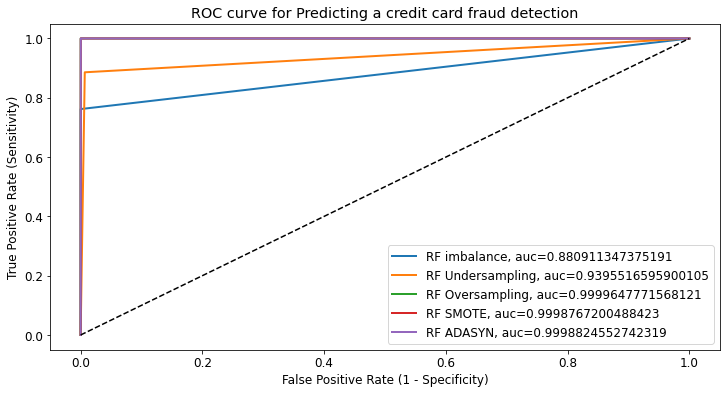

In [133]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []

RFmodels.append(('RF imbalance', RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling', RandomForestClassifier(),X_under,y_under))
RFmodels.append(('RF Oversampling', RandomForestClassifier(),X_over,y_over))
RFmodels.append(('RF SMOTE', RandomForestClassifier(),X_smote,y_smote))
RFmodels.append(('RF ADASYN', RandomForestClassifier(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

## 4. Naive Bayes (NB)

Model Name : NB imbalance
Test Accuracy :0.97858
Test AUC : 0.90778
Test Precision : 0.06376
Test Recall : 0.83673
Test F1 : 0.11850
Confusion Matrix : 
 [[83490  1806]
 [   24   123]]


Model Name : NB Undersampling
Test Accuracy :0.92905
Test AUC : 0.92953
Test Precision : 1.00000
Test Recall : 0.85906
Test F1 : 0.92419
Confusion Matrix : 
 [[147   0]
 [ 21 128]]


Model Name : NB Oversampling
Test Accuracy :0.91606
Test AUC : 0.91614
Test Precision : 0.97055
Test Recall : 0.85840
Test F1 : 0.91104
Confusion Matrix : 
 [[82947  2225]
 [12095 73322]]


Model Name : NB SMOTE
Test Accuracy :0.91401
Test AUC : 0.91410
Test Precision : 0.97080
Test Recall : 0.85395
Test F1 : 0.90863
Confusion Matrix : 
 [[82978  2194]
 [12475 72942]]


Model Name : NB ADASYN
Test Accuracy :0.72229
Test AUC : 0.72288
Test Precision : 0.91231
Test Recall : 0.49344
Test F1 : 0.64047
Confusion Matrix : 
 [[81018  4056]
 [43318 42196]]




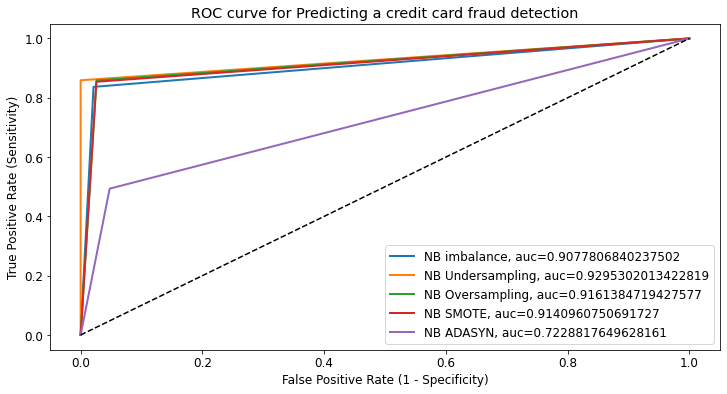

In [134]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X,y))
NBmodels.append(('NB Undersampling', GaussianNB(),X_under,y_under))
NBmodels.append(('NB Oversampling', GaussianNB(),X_over,y_over))
NBmodels.append(('NB SMOTE', GaussianNB(),X_smote,y_smote))
NBmodels.append(('NB ADASYN', GaussianNB(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

### Performance measures of various classifiers

In [140]:
data = {'Model':names_lst,
       'Accuracy':accuracy_test_lst,
       'AUC':aucs_test_lst,
       'Precision Score':precision_test_lst,
       'Recall Score':recall_test_lst,
       'F1 Score':f1_test_lst}

print("Performance measures of various classifiers: IN DESCENDING ORDER \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['AUC','Recall Score','F1 Score'],ascending=False)

Performance measures of various classifiers: IN DESCENDING ORDER 



,Model,Accuracy,AUC,Precision Score,Recall Score,F1 Score
12,RF Oversampling,0.999965,0.999965,0.999930,1.000000,0.999965
14,RF ADASYN,0.999883,0.999882,0.999766,1.000000,0.999883
13,RF SMOTE,0.999877,0.999877,0.999754,1.000000,0.999877
7,DT Oversampling,0.999742,0.999742,0.999485,1.000000,0.999743
9,DT ADASYN,0.998570,0.998567,0.997689,0.999462,0.998575
8,DT SMOTE,0.998101,0.998100,0.997300,0.998911,0.998105
2,LR Oversampling,0.946403,0.946446,0.974790,0.916668,0.944836
3,LR SMOTE,0.945243,0.945285,0.973204,0.915860,0.943661
1,LR Undersampling,0.942568,0.942679,0.958333,0.926174,0.941980
11,RF Undersampling,0.939189,0.939552,0.992481,0.885906,0.936170


Hightlights

After training each of the models, these are the final results. All of the scores for ''''Random Forest with Oversampling'''' technique are very promising for our dataset! 


In the ROC graph above, the AUC scores for Random Forest with Oversampling technique is pretty high, which is what we’d like to see. As we move further right along the curve, we both capture more True Positives but also incur more False Positives. This means we capture more fraudulent transactions, but also flag even more normal transactions as fraudulent.

#### So Random Forest with Oversampling technique is our final model, as this gives highest Recall score of 100% on both train and test datasets.